### EULER IMPLICIT : WORKING METHOD
This code is referred to this site (including the variable change and the boundary conditions)
-> https://uma.ensta-paris.fr/labo/files/zidani/S1-1/Projets_2008.pdf

Elapsed time: 2.01 seconds


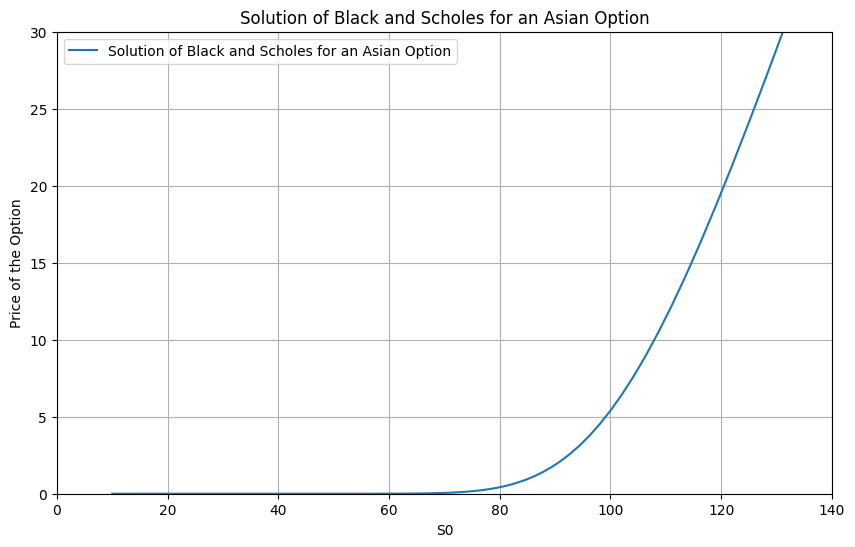

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

# PARAMETERS
M = 100                 # Number of time steps
T = 1.0                 # Maturity
K = 100                 # Strike price of the option
S0 = 95                 # Initial price of the underlying asset
r = 0.05                # Risk-free interest rate
sigma = 0.2             # Volatility
N = 1000                # Number of price grid points
dt = T / M              # Time step
Xmax = 10.0             # Maximum for the spatial grid (x) must be > K/S
Xmin = -10.0            # Minimum for the spatial grid (x) must be < 0.0
dx = (Xmax - Xmin) / N  # Spatial step

# Initializing matrices and vectors
C = np.zeros((M + 1, N + 1))  # Option price matrix
X = np.linspace(Xmin, Xmax, N + 1)  # Spatial grid
t = np.linspace(0, T, M + 1)        # Time grid

# Boundary conditions
C[M, :] = np.maximum(-X, 0)  # At maturity f(T, x) = max(-x, 0)
C[:, 0] = 0.0                # For x -> -∞ ou  (1/r*T) * (1 - np.exp(-r*(T-t))) ?        
C[:, N] = 0.0                # For x -> ∞


# Matrix A for the implicit scheme
main_diag = -1 / dt - (sigma**2 * X[1:N]**2) / dx**2
upper_diag = 0.5 * (sigma**2 * X[2:N]**2 / dx**2) - ((1 / T + r * X[2:N]) / (2 * dx))
lower_diag = 0.5 * (sigma**2 * X[1:N-1]**2 / dx**2) + ((1 / T + r * X[1:N-1]) / (2 * dx))

A = np.diag(main_diag) + np.diag(upper_diag, 1) + np.diag(lower_diag, -1)

# Start the timer
start = time.time()

# Time-stepping loop (implicit)
for i in range(M - 1, -1, -1):  # Backward in time
    
    # Right-hand side vector
    b = -C[i + 1, 1:N] / dt

    # Add boundary conditions
    b[0] -= lower_diag[0] * C[i, 0]
    b[-1] -= upper_diag[-1] * C[i, N]

    # Solve the linear system A * C[i, 1:N] = b
    C[i, 1:N] = np.linalg.solve(A, b)

# Stop the timer
end = time.time()
print(f"Elapsed time: {end - start:.2f} seconds")

# Convert x to S (price of the underlying asset)
S = K / np.maximum(X, 1e-5)  # Avoid division by zero or negative x must filter the high values with Smax

# Plotting the result

Smax = 140    # We set Smax to 1000 because we have some fault values due to the variable changes
Cmax = 30
plt.figure(figsize=(10, 6))
plt.plot(S, S*C[0, :], label="Solution of Black and Scholes for an Asian Option")
plt.xlabel("S0")
plt.ylabel("Price of the Option")
plt.title("Solution of Black and Scholes for an Asian Option")
plt.xlim([0,Smax])
plt.ylim([0,Cmax])
plt.legend()
plt.grid()
plt.show()

plt.show()

In [93]:
S0_to_see = 95
index_approx_200 = np.argmin(np.abs(S - S0_to_see))  # Trouve l'indice proche de 200
print(f"Index at S ~ {S0_to_see}  : {index_approx_200}")
print(f"Value of S at this index : {S[index_approx_200]}")
print(f"The value of the option is : ", S[index_approx_200]*C[0,index_approx_200])

Index at S ~ 95  : 553
Value of S at this index : 94.3396226415094
The value of the option is :  3.103207163584459
